<a href="https://colab.research.google.com/github/kentokura/python_medical_images/blob/master/chapter3/chap3_16_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
from google.colab import drive
from IPython.display import Image, display_png

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 3.16 ヒストグラム均等化



cdf : 累積分布関数  
cumsum : Cumulative sum = 累積和  
numpy.ma : [masked array](https://numpy.org/doc/stable/reference/maskedarray.generic.html?highlight=ma#module-numpy.ma)

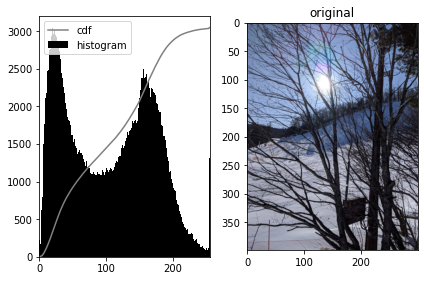

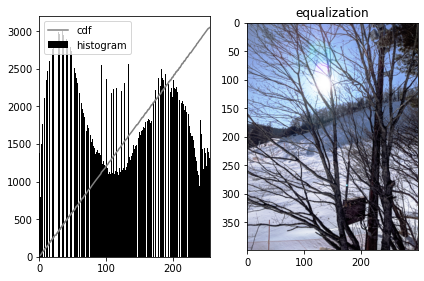

In [0]:
bgr = cv2.imread(
    "/content/drive/My Drive/DATASET/dataset/HistogramEqualization.png",
    cv2.IMREAD_COLOR)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

hist, bins = np.histogram(rgb, 256,[0,256])
# 階調変換関数を取得
cdf = hist.cumsum() # リスト順に累積したリストを返す
cdf_normalized = cdf * hist.max() / cdf.max()

# 均等化処理
cdf_m = np.ma.masked_equal(cdf, 0) # まずヒストグラム内の最小値を見つける(0を除く)
# 均等化の処理を計算
# 処理はすべてマスクされていない要素にだけ作用する
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# 計算結果配列から画素値を取り出す
img2 = cdf[rgb] # わからん。わかった!昔の人はすげーや。

# 均等化後のヒストグラム
hist, bins = np.histogram(img2, 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized2 = cdf * hist.max() / cdf.max()
# 比較表示
plt.subplot(121)
plt.plot(cdf_normalized, color = 'gray')
plt.hist(rgb.flatten(), 256, [0, 256], color='black')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')

plt.subplot(122)
plt.imshow(rgb)
plt.title("original")
plt.tight_layout()
plt.show()

plt.subplot(121)
plt.plot(cdf_normalized2, color = 'gray')
plt.hist(img2.flatten(), 256, [0, 256], color='black')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')

plt.subplot(122)
plt.imshow(img2)
plt.title("equalization")
plt.tight_layout()
plt.show()


numpy には copy と view がある。